## Leer los Datos Limpios

En primer lugar, se leen los datos limpios que se incluyen en el archivo "HalfProcessedDataset.csv", que se obtuvo como resultado de la Parte I de la limpieza de datos.

In [24]:
# Librerías a utilizar
import pandas as pd
import numpy as np
import random

In [25]:
data = pd.read_csv("Input/HalfProcessedDataset.csv", index_col=0, header=[0,1])
data.head(5)

SURESTE                                      NORESTE  \
                        NO2        O3   PM10     SO2  WSR    WDV     NO2   
2023-01-01 01:00:00  0.0303  0.003000  116.0  0.0034  3.3  278.0  0.0444   
2023-01-01 02:00:00  0.0288  0.003000  117.0  0.0036  3.7  278.0  0.0415   
2023-01-01 03:00:00  0.0291  0.003000  135.0  0.0038  3.6  197.0  0.0423   
2023-01-01 04:00:00  0.0257  0.003333  132.0  0.0036  4.9  271.0  0.0399   
2023-01-01 05:00:00  0.0231  0.003667   96.0  0.0030  6.8  284.0  0.0351   

                                           ... NORESTE 3                      \
                        O3   PM10     SO2  ...      PM10     SO2  WSR    WDR   
2023-01-01 01:00:00  0.008  311.0  0.0240  ...      92.0  0.0028  3.6  254.0   
2023-01-01 02:00:00  0.007  723.0  0.0098  ...     133.0  0.0028  4.1  250.0   
2023-01-01 03:00:00  0.006  473.0  0.0078  ...     115.0  0.0029  4.4  246.0   
2023-01-01 04:00:00  0.005  372.0  0.0073  ...     114.0  0.0029  5.1  264.0   
2023-01-01 05:00:00  0.006  285.0  0.0060  ...     100.0  0.0054  4.8  262.0   

                    NOROESTE 3                                    
                           NO2     O3   PM10     SO2   WSR   WDR  
2023-01-01 01:00:00     0.0288  0.003  246.0  0.0029  65.3  95.0  
2023-01-01 02:00:00     0.0268  0.003  239.0  0.0032  60.9  90.0  
2023-01-01 03:00:00     0.0240  0.002  275.0  0.0023  58.1  84.0  
2023-01-01 04:00:00     0.0222  0.002  189.0  0.0018  61.4  87.0  
2023-01-01 05:00:00     0.0211  0.003  103.0  0.0018  62.9  88.0  

[5 rows x 78 columns]

## Manejando Duplicados

In [26]:
print("La forma del dataset es", data.shape)
print("La cantidad de valores únicos en los índices es:",
      len(np.unique(data.index)))

La forma del dataset es (13869, 78)
La cantidad de valores únicos en los índices es: 13869


Con esto se observa que, como cabría esperar, todos los índices tienen datos diferentes, por lo que, aún si existiera un par de entradas muy parecidas, si pertenecen a diferentes puntos de una serie de tiempo, deben conservarse ambas. Aún así, para tranquilidad del lector, se hará una eliminación automática de los datos duplicados y se observará que no hubo cambios en la forma del dataset.

In [27]:
print("Las dimensiones del dataset después de eliminar duplicados son:", data.drop_duplicates().shape)

Las dimensiones del dataset después de eliminar duplicados son: (13869, 78)


## Transformación de Datos Propuesta

Se propone, para evitar el doble header y obtener una estructura más manejable y analizable de los datos, dividir el dataframe en una lista de 5 dataframes, tal que cada uno contenga la información correspondiente a una estación, siguiendo el orden:
- 0: "NORTE 2"
- 1: "NORESTE"
- 2: "SURESTE"
- 3: "CENTRO"
- 4: "SUROESTE"
- 5: "NOROESTE 2"
- 6: "NORESTE 2"
- 7: "SURESTE 2"
- 8: "SUROESTE 2"
- 9: "SURESTE 3"
- 10: "SUR"
- 11: "NORESTE 3"
- 12: "NOROESTE 3"

In [28]:
#names = ['NORTE 2', 'NORTE', 'NORESTE', 'SURESTE', 'CENTRO'] 
names = ["NORTE 2", "NORESTE", "SURESTE", "CENTRO", "SUROESTE",
         "NOROESTE 2", "NORESTE2", "SURESTE2", "SUROESTE2",
         "SURESTE 3", "SUR","NORESTE 3", "NOROESTE 3"]


newData = []
for name in names:
    newData.append(data[name])

newData

[                        NO2     O3   PM10     SO2   WSR    WDR
 2023-01-01 01:00:00  0.0473  0.013  478.0  0.0058   2.2  272.0
 2023-01-01 02:00:00  0.0431  0.011  566.0  0.0060   3.7  221.0
 2023-01-01 03:00:00  0.0421  0.011  498.0  0.0061   2.5  290.0
 2023-01-01 04:00:00  0.0404  0.011  483.0  0.0050   1.9  280.0
 2023-01-01 05:00:00  0.0373  0.009  452.0  0.0045   4.4  246.0
 ...                     ...    ...    ...     ...   ...    ...
 2024-07-31 19:00:00  0.0172  0.017   99.0  0.0031  10.3  122.0
 2024-07-31 20:00:00  0.0158  0.019   98.0  0.0031  12.5  107.0
 2024-07-31 21:00:00  0.0190  0.020  101.0  0.0038  10.4   85.0
 2024-07-31 22:00:00  0.0190  0.020  101.0  0.0038  10.4   85.0
 2024-07-31 23:00:00  0.0190  0.020  101.0  0.0038  10.4   85.0
 
 [13869 rows x 6 columns],
                         NO2     O3   PM10     SO2   WSR    WDV
 2023-01-01 01:00:00  0.0444  0.008  311.0  0.0240   1.4  222.0
 2023-01-01 02:00:00  0.0415  0.007  723.0  0.0098   2.5    4.0
 2023-01-01

### Propuesta Alternativa

Se propone agregar una columna categórica correspondiente a la estación de la que procede cada entrada, esto permitiría combinar todos los dataframes en uno solo que sea bien manejable, facil de filtrar y de operar. Eso es posible en Python, pues Pandas permite índices duplicados. Aún no estoy seguro de que R tenga esa bondad.

### Una Pequeña Correción

La primera estación ("NORTE 2") tiene una diferencia, pues la variable correspondiente al tiempo se llama "WDR" en lugar de "WDV", como en todas las demás.

In [29]:
newData[0].rename(columns = {'WDR': 'WDV'}, inplace = True)

C:\Users\juanj\AppData\Local\Temp\ipykernel_12588\306540203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData[0].rename(columns = {'WDR': 'WDV'}, inplace = True)


## Algunas Visualizaciones



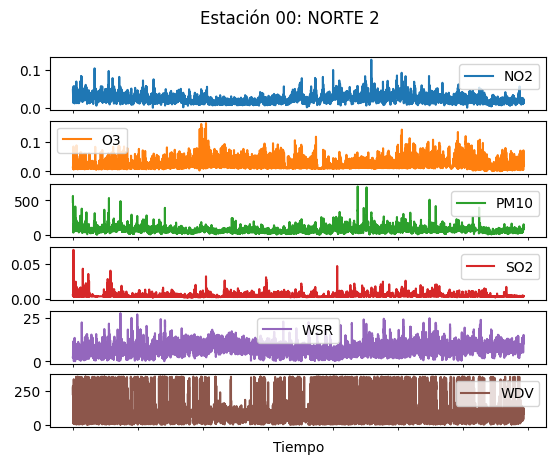

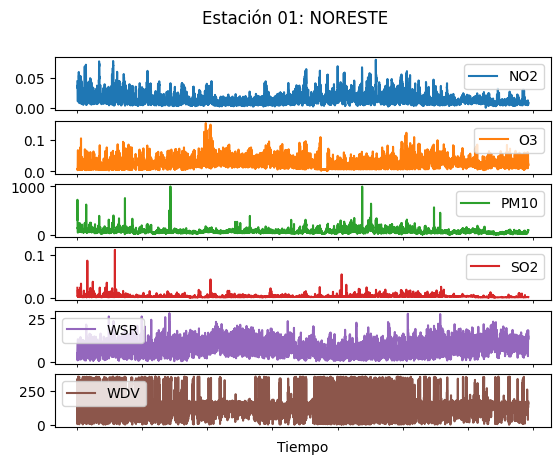

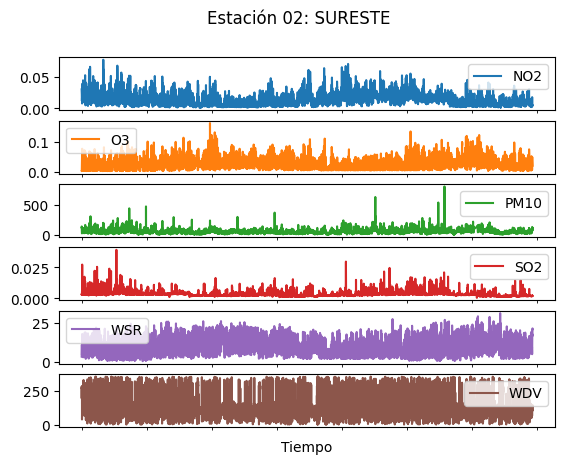

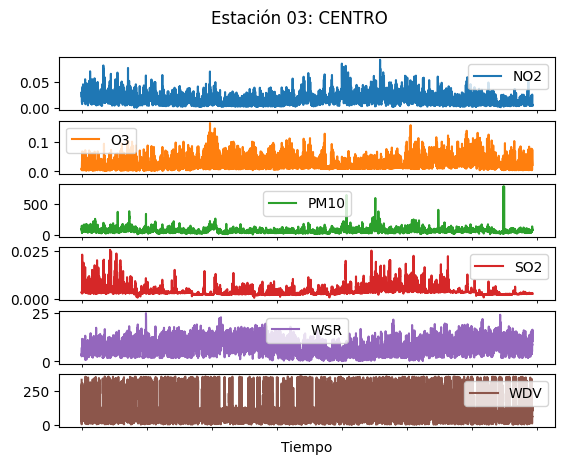

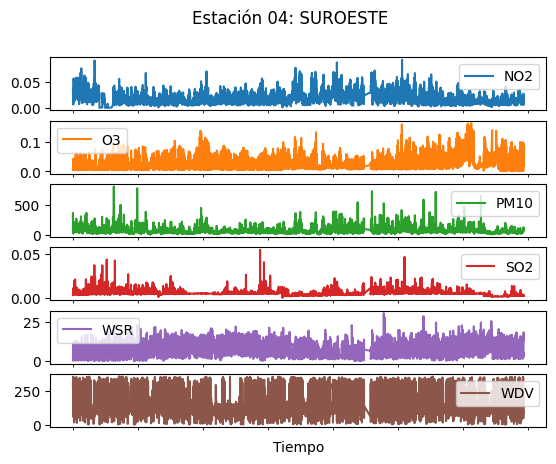

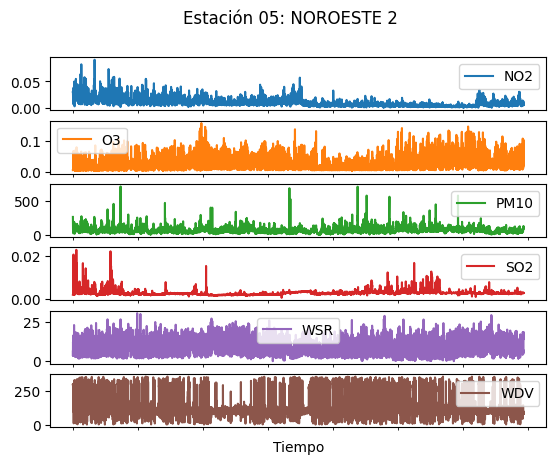

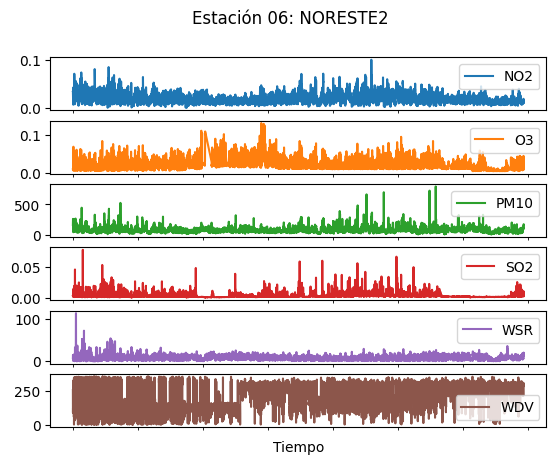

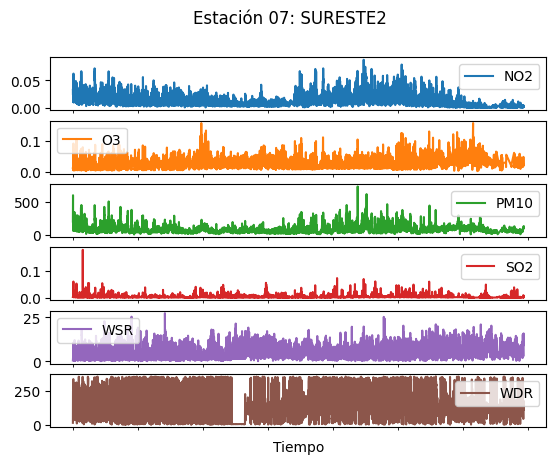

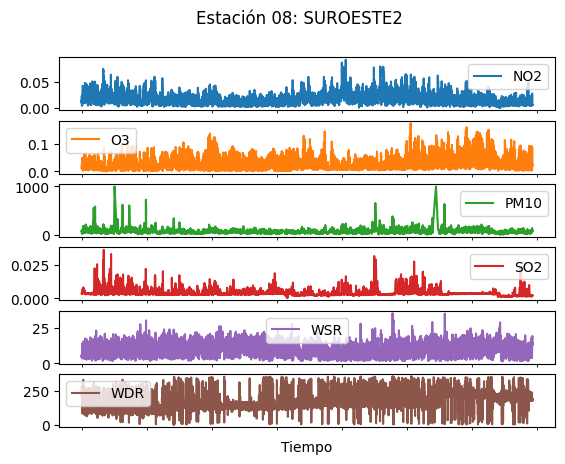

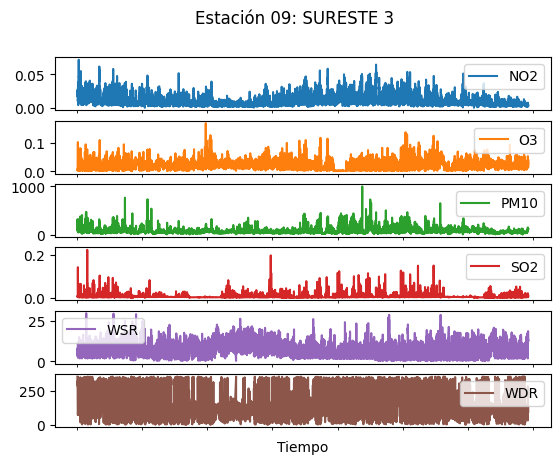

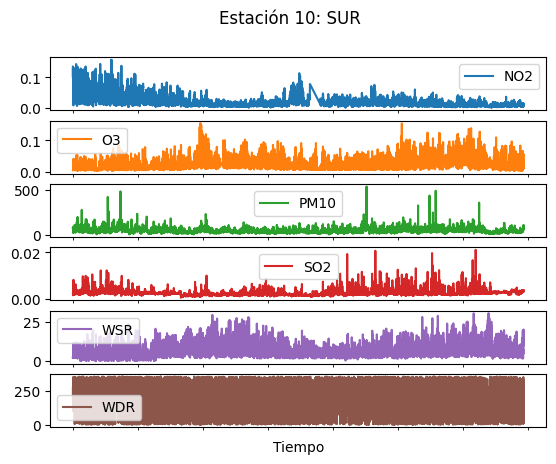

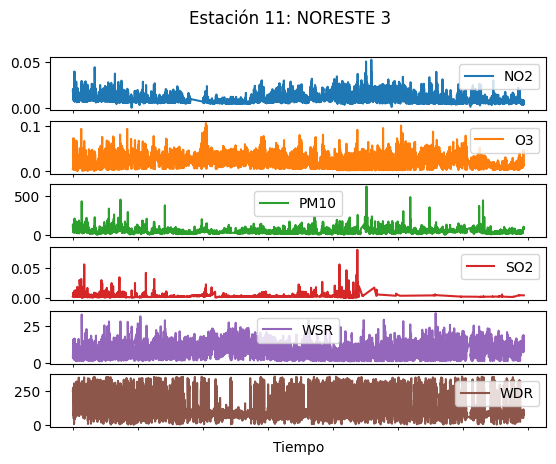

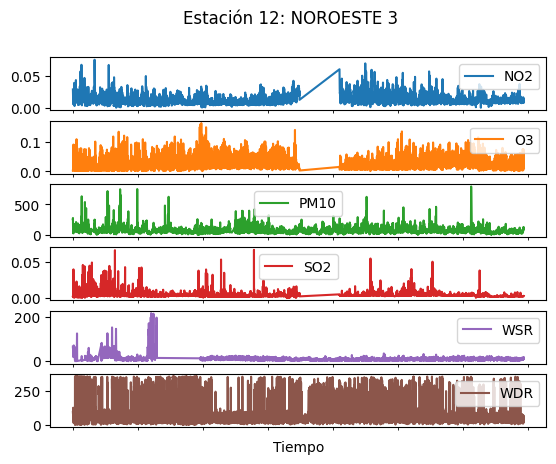

In [30]:
for i in range(len(newData)):
    newData[i].plot(title = f"Estación {i :0>2}: {names[i]}", xlabel = "Tiempo", xticks = [], subplots = True)

<AxesSubplot: >

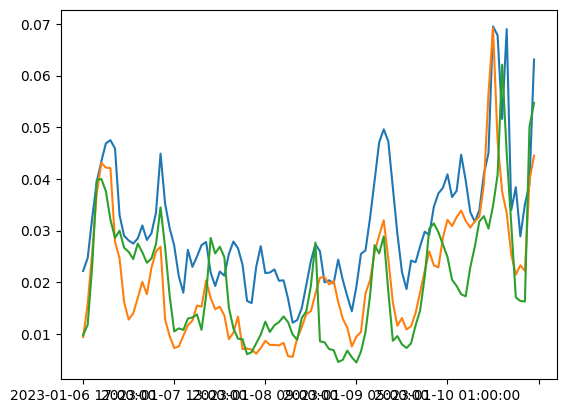

In [34]:
aux = int(random.random() * 250)
newData[0]["NO2"].iloc[aux : aux+100].plot()
newData[1]["NO2"].iloc[aux : aux+100].plot()
newData[2]["NO2"].iloc[aux : aux+100].plot()

## Guardar los Datos Transformados y Revisados

In [35]:
for i in range(len(newData)):
    newData[i].to_csv(f"Output/{i :0>2}.csv")